In [35]:
!kaggle datasets download -d milanvaddoriya/data-science-job-salary --unzip

Dataset URL: https://www.kaggle.com/datasets/milanvaddoriya/data-science-job-salary
License(s): other




  0%|          | 0.00/9.97k [00:00<?, ?B/s]
100%|██████████| 9.97k/9.97k [00:00<00:00, 986kB/s]


In [36]:
import pandas as pd

ds_job = pd.read_csv('datascience_salaries.csv')

ds_job.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [37]:
ds_job.drop(ds_job.columns[0], axis=1, inplace=True)
ds_job.head()

,job_title,job_type,experience_level,location,salary_currency,salary
0,Data scientist,Full Time,Senior,New York City,USD,149000
1,Data scientist,Full Time,Senior,Boston,USD,120000
2,Data scientist,Full Time,Senior,London,USD,68000
3,Data scientist,Full Time,Senior,Boston,USD,120000
4,Data scientist,Full Time,Senior,New York City,USD,149000


Normalize the ‘salary’ column using Min-Max normalization.

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'salary' column
ds_job['salary_normalized'] = scaler.fit_transform(ds_job[['salary']])

# Display the dataset with the normalized salary
ds_job[['salary', 'salary_normalized']].head()


,salary,salary_normalized
0,149000,0.601010
1,120000,0.454545
2,68000,0.191919
3,120000,0.454545
4,149000,0.601010


Encoding 

In [39]:
ds_job['experience_level'].unique()

array(['Senior', 'Entry', 'Mid', 'Executive'], dtype=object)

In [40]:
# One-hot encode 'job_title', 'location', and 'salary_currency'
ds_job = pd.get_dummies(ds_job, columns=['job_title', 'location', 'salary_currency'])

# Label encode 'job_type' (Internship = 0, Full-Time = 1)
job_type_mapping = {'Internship': 0, 'Full Time': 1}
ds_job['job_type'] = ds_job['job_type'].map(job_type_mapping)

# Label encode 'experience_level' (Entry = 0, Mid = 1, Senior = 2, Executive = 3)
experience_mapping = {'Entry': 0, 'Mid': 1, 'Senior': 2, 'Executive': 3}
ds_job['experience_level'] = ds_job['experience_level'].map(experience_mapping)

ds_job.head()

,job_type,experience_level,salary,salary_normalized,job_title_Big data,job_title_Data analyst,job_title_Data scientist,job_title_ML Ops,job_title_Machine learning,location_Aarhus,...,location_Wilmington,location_Work from Home,location_Wrocław,location_Zurich,location_tel aviv,location_České Budějovice,location_İstanbul,salary_currency_EUR,salary_currency_GBP,salary_currency_USD
0,1,2,149000,0.601010,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,2,120000,0.454545,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1,2,68000,0.191919,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,2,120000,0.454545,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1,2,149000,0.601010,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


Implement dimensionality reduction on the dataset.

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop salary since it's assumed to be the target
ds_job_without_salary = ds_job.drop(['salary', 'salary_normalized'], axis=1)

# Standardize the features. As far as I understand we should do it with all our feaurues
scaler = StandardScaler()
df_scaled = scaler.fit_transform(ds_job_without_salary)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce the dataset to 2 principal components
pca_result = pca.fit_transform(df_scaled)

# Convert PCA result into a DataFrame
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

df_pca

,PC1,PC2
0,0.065352,-1.141178
1,0.019155,-1.328563
2,-0.335601,-0.832542
3,0.019155,-1.328563
4,0.065352,-1.141178
...,...,...
1166,0.351083,-1.029781
1167,0.322732,-0.852708
1168,0.422082,-0.896752
1169,0.356792,-1.090908


Aggregate data by ‘experience_level’, calculating average and median salaries.

In [42]:
salary_aggregates = ds_job.groupby('experience_level')['salary'].agg(['mean', 'median']).reset_index()

salary_aggregates.columns = ['experience_level', 'average_salary', 'median_salary']

salary_aggregates

,experience_level,average_salary,median_salary
0,0,36111.111111,30000.0
1,1,51786.885246,51000.0
2,2,75088.033012,68000.0
3,3,76076.923077,46000.0


# Some additional things with PCA

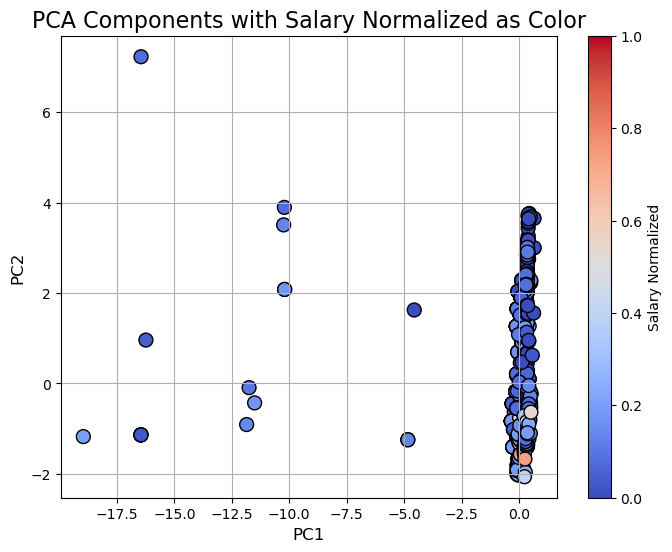

In [43]:
import matplotlib.pyplot as plt
import pandas as pd



plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=ds_job['salary_normalized'], cmap='coolwarm', s=100, edgecolor='black')
plt.title('PCA Components with Salary Normalized as Color', fontsize=16)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.colorbar(scatter, label='Salary Normalized')
plt.grid(True)
plt.show()


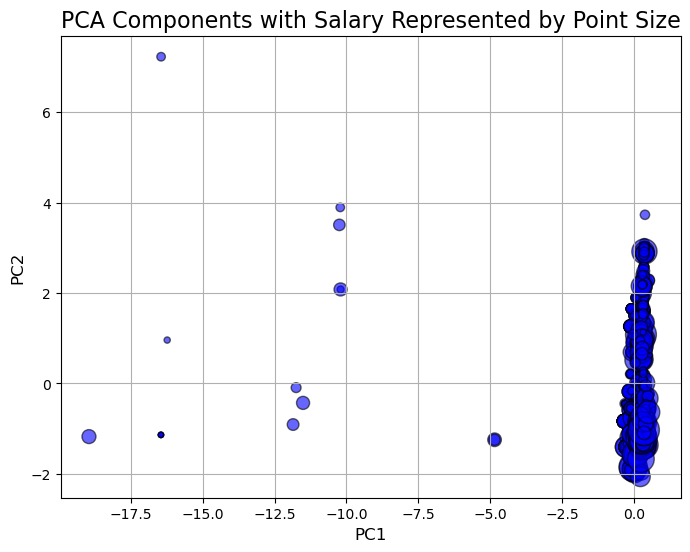

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], s=ds_job['salary_normalized']*500, c='blue', alpha=0.6, edgecolor='black')
plt.title('PCA Components with Salary Represented by Point Size', fontsize=16)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.grid(True)
plt.show()


Well, not so interesting and insightful. Maybe it would be a good idea to deal with outliers before doing PCA